In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

matplotlib.style.use('ggplot')
pd.set_option("display.max_columns", None)

In [33]:
# We are going to investigate the individual contributions
# contain informations such as name,address,job,amount

headers = pd.read_csv('indiv_header_file.csv')
headers

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID


In [34]:
fec = pd.read_csv('itcont.txt.zip', sep="|", nrows=10, names=headers.columns)
fec.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,1192011,250,NaN,INCA210,713442,NaN,NaN,4030920111137082784
1,C00377051,N,M2,NaN,11930332597,15,IND,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,1102011,350,NaN,INCA161,713448,NaN,NaN,4030920111137082785
2,C00377051,N,M2,NaN,11930332597,15,IND,"SCHACHTERLE, DIANE",CARMICHAEL,CA,95608,ACRI,DIRECTOR OF POLICY,1102011,300,NaN,INCA164,713448,NaN,NaN,4030920111137082786
3,C00487447,N,M2,NaN,11930332701,15,IND,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011,283,NaN,PR1611594225441,713467,NaN,P/R DEDUCTION ($283.33 SEMI-MONTHLY),4030920111137082792
4,C00487447,N,M2,NaN,11930332701,15,IND,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011,250,NaN,PR675291525441,713467,NaN,P/R DEDUCTION ($250.00 SEMI-MONTHLY),4030920111137082793


Tip: In order to make the read.csv function more effiecient we can give the data_type for the columns

In [35]:
# Declaring all the columns as str except TRANSACTION_AMT float
data_types = { header: str for header in headers }
data_types['TRANSACTION_AMT'] = float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

In [36]:
fec = pd.read_csv('itcont.txt.zip', 
                  sep="|", 
                  names=headers.columns,
                  dtype=data_types)

fec.shape

(3372139, 21)

In [37]:
fec.sample(10)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
2668180,C00003418,A,M8,NaN,13962681136,15,IND,"SILVA, JULIO MR.",MOBILE,AL,36609,RETIRED,RETIRED,07052012,200.0,NaN,2012M08L11AI17743,872159,NaN,NaN,4052220131190018396
537930,C00495879,A,Q3,P,11020382439,15,IND,"MEYER, KELLY",MALIBU,CA,90265,NaN,NOT EMPLOYED,09302011,500.0,NaN,SA1025100512321,750978,NaN,NaN,1013120120009338040
2320764,C00000935,A,M7,NaN,13961210376,15,IND,"FRAZIER, MONIQUE P.",WASHINGTON,DC,20002,HSBC,GOVERNMENT AFFAIRS,06182012,250.0,NaN,C8822372,862548,NaN,NaN,4032920131185893880
2655256,C00003418,A,30G,NaN,13962662899,15,IND,"LABORDE, EDWARD T",NEW ORLEANS,LA,70115,REQUESTED,REQUESTED,10312012,300.0,NaN,2012G20L11AI25098,872153,NaN,NaN,4052320131190331694
329531,C00000935,A,M7,NaN,11952624748,15,IND,"PERRY, CARMELLA",GOODYEAR,AZ,85395,NaN,RETIRED,06132011,500.0,NaN,C7639199,748579,NaN,NaN,4101720111143666197
622529,C00144147,N,YE,NaN,12950237999,15,IND,"COLLINS, MICHAEL G. MR.","GULFPORT,",MS,39502,MISSISSIPPI POWER COMPANY,"MANAGER, PINE BELT DIVISION",12312011,240.0,NaN,SA11AI.17620,760568,NaN,NaN,4021420121151089038
940073,C00499517,A,Q3,G,14020284805,15,IND,"VAN ANDEL, DAVID",GRAND RAPIDS,MI,49546,VAN ANDEL INSTITUTE,CHAIRMAN & CEO,09022011,2500.0,NaN,SA0519144805623,926021,NaN,DIRECT CON,2061620141215220725
63954,C00337626,N,M5,NaN,11931502633,15,IND,"WILSON, SCOTT",NEW YORK,NY,10019,MORGAN STANLEY,MANAGING DIRECTOR,04072011,3750.0,NaN,AE0355E723E314D59B43,729644,NaN,NaN,4060820111140691501
3366303,C00431171,A,M10,G2012,14970039060,15,IND,"SAGE, BRENDA",LAS VEGAS,NV,89123,RETIRED,RETIRED,09302012,250.0,NaN,SA17.2976852,944828,NaN,NaN,4081320141220697583
1945700,C00466359,A,Q3,G2012,13960541893,15,IND,"MOORE, ROBERT",BELMONT,OH,43718,AMERICAN ENERGY CORP,MINING,07182012,1400.0,NaN,A-C9594,850876,NaN,NaN,4021120131181171930


We can see that the contibutions do not happen to a specific candiate but rather to a commitie

In [38]:
cm_headers =  pd.read_csv('cm_header_file.csv')
cm_headers

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID


In [39]:
cm = pd.read_csv('cm.txt', 
                  sep="|", 
                  names=cm_headers.columns)
print(cm.shape)
cm.head(5)

(14455, 15)


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000042,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,"LYNCH, MICHAEL J. MR.",3600 WEST LAKE AVENUE,NaN,GLENVIEW,IL,60026.0,B,Q,NaN,Q,C,ILLINOIS TOOL WORKS INC.,NaN
1,C00000059,HALLMARK CARDS PAC,GREG SWARENS,2501 MCGEE,MD#288,KANSAS CITY,MO,64108.0,U,Q,UNK,M,C,NaN,NaN
2,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001.0,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
3,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107.0,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
4,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612.0,U,Q,UNK,Q,T,MEDICAL ASS'N; KANSAS [AMPAC],NaN


In [40]:
# We have to merge  the 2 dataframes
fec = pd.merge(fec, 
               cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')

print(fec.shape)
fec.head(5)

(3372139, 23)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,01192011,250.0,NaN,INCA210,713442,NaN,NaN,4030920111137082784,"ATLAS PAC, FEDERAL",NaN
1,C00425645,A,M3,NaN,11930501656,15,IND,"LOWREY, LEE",NEWPORT BEACH,CA,92658,PACER COMMUNITIES,DIRECTOR OF FINANCE,02032011,500.0,NaN,PAYA212,717650,NaN,NaN,4031820111137613153,"ATLAS PAC, FEDERAL",NaN
2,C00425645,A,M3,NaN,11930501656,15,IND,"FEATHER, KATHRYN",GARDEN GROVE,CA,92840,COUNTY OF ORANGE,POLICY ADVISOR,02222011,250.0,NaN,INCA221,717650,NaN,NaN,4031820111137613154,"ATLAS PAC, FEDERAL",NaN
3,C00425645,A,M3,NaN,11930501656,15,IND,"TOBIN, KEVIN",COSTA MESA,CA,92626,UCI,ENGINEER,02222011,250.0,NaN,INCA219,717650,NaN,NaN,4031820111137613155,"ATLAS PAC, FEDERAL",NaN
4,C00425645,N,M5,NaN,11931295390,15,IND,"DREYER, MARY",DANA POINT,CA,92629,SANTA ANA USD,TEACHER,04272011,250.0,NaN,INCA248,727360,NaN,NaN,4050920111139806337,"ATLAS PAC, FEDERAL",NaN


There are different types of join
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [41]:
cn_headers =  pd.read_csv('cn_header_file.csv')
cn_headers

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP


In [42]:
cn = pd.read_csv('cn.txt', 
                  sep="|", 
                  names=cn_headers.columns)
cn.head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00089,"CRAWFORD, HARRY T JR",DEM,2010,AK,H,0.0,C,P,C00466698,4350 BUTTE CIR,NaN,ANCHORAGE,AK,99504.0
1,H0AK00097,"COX, JOHN ROBERT",REP,2012,AK,H,0.0,C,N,C00525261,PO BOX 1092,NaN,ANCHOR POINT,AK,995561092.0
2,H0AL00016,"BOZEMAN, MARTHA RENEE",UNK,2010,AL,H,7.0,O,C,C00464040,PO BOX 2512,NaN,BIRMINGHAM,AL,35201.0
3,H0AL01030,"GOUNARES, PETER HUNTER",REP,2012,AL,H,1.0,C,C,C00459495,PO BOX 1010,NaN,ORANGE BEACH,AL,36561.0
4,H0AL02087,"ROBY, MARTHA",REP,2012,AL,H,2.0,I,C,C00462143,3260 BANKHEAD AVENUE,NaN,MONTGOMERY,AL,36106.0


In [43]:
cn['CAND_NAME'].unique()

array(['CRAWFORD, HARRY T JR', 'COX, JOHN ROBERT',
       'BOZEMAN, MARTHA RENEE', ..., 'NEUMANN, MARK W',
       'FLETCHER, SHEIRL LEE', 'GOODENOUGH, KEITH B.'], dtype=object)

In [44]:
cn['CAND_NAME'].unique().shape # This contains all the elections not the only ones we are intereted in

(5524,)

In [45]:
cn[cn['CAND_NAME'].str.contains('OBAMA')] # find OBAMA

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


In [46]:
cn[cn['CAND_NAME'].str.contains('ROMNEY')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4620,P80003353,"ROMNEY, MITT / RYAN, PAUL D.",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


In [47]:
# Why only OBAMA is listed?
cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT / RYAN, PAUL D.'])] # selecting both of them

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


In [48]:
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'].values

array(['ROMNEY, MITT / RYAN, PAUL D. '], dtype=object)

As we can see from above that the name is declared with a space at the end and , ; By executing this command is the only way you could have figured it out

In [49]:
# Lets correct that
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'] = 'ROMNEY, MITT'
cn[cn['CAND_NAME'].str.contains('ROMNEY')]['CAND_NAME'].values

array(['ROMNEY, MITT'], dtype=object)

In [50]:
# Store in cn_bomr
cn_bomr = cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT'])]
cn_bomr

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0
4620,P80003353,"ROMNEY, MITT",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


In [51]:
# Mergin them togethe
fec = pd.merge(fec, 
               cn_bomr[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')

print(fec.shape)
fec.head(5)

(1059267, 25)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00431445,N,Q1,P2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106502,724196,NaN,NaN,4041920111138175295,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
1,C00431445,N,Q1,G2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106503,724196,NaN,NaN,4041920111138175296,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
2,C00431445,A,Q3,P2012,12970029343,15,IND,"ANTHONY, KENT",LEAGUE CITY,TX,77573,THE METHODIST HOSPITAL SYSTEM,PHYSICIAN,09302011,1000.0,NaN,C12462768,756218,NaN,NaN,4021620121151193386,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
3,C00431445,A,Q3,P2012,12970029344,15,IND,"KAHN, VIRGINIA",CAMBRIDGE,MA,02138,RETIRED,RETIRED,08082011,1000.0,NaN,C11861688,756218,NaN,NaN,4021620121151193391,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
4,C00431445,A,Q3,P2012,12970021794,15,IND,"ELSON, SALLY T",CHICAGO,IL,60657,NaN,INFORMATION REQUESTED,09202011,250.0,NaN,C12160885,756218,NaN,NaN,4021620121151170741,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM


Row number is decreased but column number increase

In [53]:
fec['CAND_NAME'].value_counts() # Founding how many donations were made

OBAMA, BARACK    637617
ROMNEY, MITT     421650
Name: CAND_NAME, dtype: int64

In [54]:
(fec['TRANSACTION_AMT'] > 0).value_counts()

True     1052127
False       7140
Name: TRANSACTION_AMT, dtype: int64

In [56]:
fec = fec.loc[fec['TRANSACTION_AMT'] > 0] # Keeping only the transactions that gave money

In [58]:
fec['OCCUPATION'].value_counts()[:20] # find the fisrt 20 occupations 

RETIRED                  202024
ATTORNEY                  60801
PHYSICIAN                 38559
HOMEMAKER                 33144
PROFESSOR                 17480
CONSULTANT                17275
LAWYER                    15645
ENGINEER                  12000
PRESIDENT                 11941
INFORMATION REQUESTED     11825
EXECUTIVE                 10564
SELF-EMPLOYED              9889
NONE                       8499
MANAGER                    8392
TEACHER                    7651
OWNER                      7115
BUSINESS OWNER             6972
CEO                        6886
SALES                      6723
NOT EMPLOYED               6691
Name: OCCUPATION, dtype: int64

By using pivot_table() will create a new dataframe with index,columns,values...
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [59]:
by_occupation = fec.pivot_table(index='OCCUPATION', 
                                columns='CAND_PTY_AFFILIATION',
                                values='TRANSACTION_AMT',
                                aggfunc='sum')
by_occupation

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN
$2500 ALREADY CONTRIBUTED,NaN,5000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN
(SEMI) RETIRED TEACHER,NaN,250.0
...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0
ZUMBA INSTRUCTOR,NaN,2500.0
\RESEARCH DIRECTOR,250.0,NaN


We can see from the data above, some of the information given to make sense for example the ZUMBA GOLD INSTRUCTOR 

In [61]:
# Summing each line
# Axis 1 --> from left to right ( column )
# Axis 0 --> from down to up ( rows )
by_occupation['SUM'] = by_occupation.sum(axis=1)
by_occupation

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN,4450.0
$2500 ALREADY CONTRIBUTED,NaN,5000.0,10000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN,1000.0
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN,3000.0
(SEMI) RETIRED TEACHER,NaN,250.0,500.0
...,...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0,500.0
ZUMBA INSTRUCTOR,NaN,2500.0,5000.0
\RESEARCH DIRECTOR,250.0,NaN,500.0


In [62]:
# Occupations that contributes 10mm$
over_10mm = by_occupation.loc[by_occupation['SUM'] >= 10**7] 
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,142816030.0
BANKER,949642.0,4468676.0,10836636.0
BUSINESS OWNER,1472733.0,7457568.0,17860602.0
C.E.O.,13500.0,16649148.0,33325296.0
CEO,12693212.0,5913438.0,37213300.0
CHAIRMAN,3828164.0,9652011.0,26960350.0
CONSULTANT,10707939.0,6985307.0,35386492.0
ENGINEER,3873910.0,4115915.0,15979650.0
EXECUTIVE,8329918.0,20468201.0,57596238.0


But we can see that CEO has 2 different values 
C.E.O and CEO
Hence we need to combine them

In [66]:
# Hence we can create our our dictionary
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'C.E.O.': 'CEO',
    'C.E.O': 'CEO'
}

# If no mapping provided, return x
# anonymous function
f = lambda x: occ_mapping.get(x, x) # get is important here since if x is not listed then it will return x
fec.loc[:, 'OCCUPATION'] = fec.loc[:, 'OCCUPATION'].map(f) # hence on every occupation it will look though f and map the necessary occupation

As we can see that pandas is much more automated that using normal programming functions.
Therefore again we have to keep in mind that complicating the code means that we should probobly use built-in fucntions

In [68]:
# Lets go back now , resulting to correct data
by_occupation = fec.pivot_table(index='OCCUPATION', 
                                columns='CAND_PTY_AFFILIATION',
                                values='TRANSACTION_AMT',
                                aggfunc='sum')
by_occupation['SUM'] = by_occupation.sum(axis=1)
over_10mm = by_occupation.loc[by_occupation['SUM'] >= 10**7] 
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
CHAIRMAN,3828164.0,9652011.0,13480175.0
CONSULTANT,10707939.0,6985307.0,17693246.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
INVESTOR,6038114.0,13428109.0,19466223.0
LAWYER,14198143.0,2482767.0,16680910.0
NOT PROVIDED,10231903.0,1701689.0,11933592.0


In [69]:
over_10mm.sort_values(by='SUM', ascending=False)

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
RETIRED,85212969.0,91770280.0,176983249.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
PRESIDENT,10428104.0,19177075.0,29605179.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
PHYSICIAN,14918921.0,13030969.0,27949890.0
INVESTOR,6038114.0,13428109.0,19466223.0
CONSULTANT,10707939.0,6985307.0,17693246.0


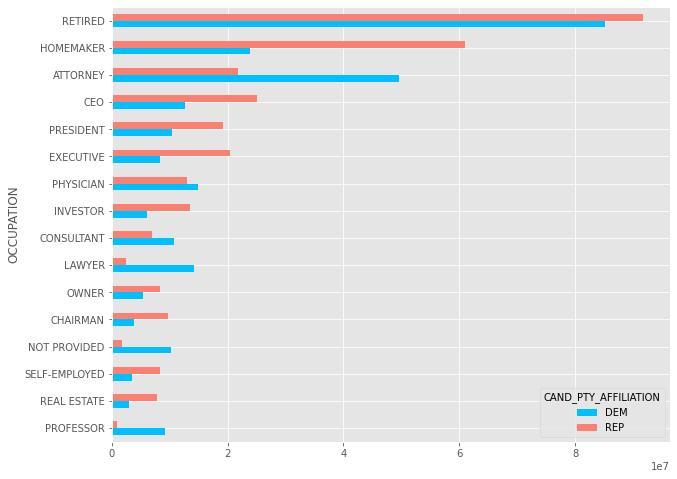

In [71]:
# Creating a horizontal bar chart
_ = over_10mm.sort_values(by='SUM', ascending=True)[['DEM', 'REP']].\
    plot(kind='barh', color=('deepskyblue', 'salmon'), figsize=(10, 8))

In [73]:
# Percentage wise [ axis 0 ]
over_10mm_pct = over_10mm[['DEM', 'REP']].div(over_10mm['SUM'], axis=0)
over_10mm_pct

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
ATTORNEY,0.694827,0.305173
CEO,0.336699,0.663301
CHAIRMAN,0.283985,0.716015
CONSULTANT,0.605199,0.394801
EXECUTIVE,0.289252,0.710748
HOMEMAKER,0.281072,0.718928
INVESTOR,0.310184,0.689816
LAWYER,0.851161,0.148839
NOT PROVIDED,0.857403,0.142597


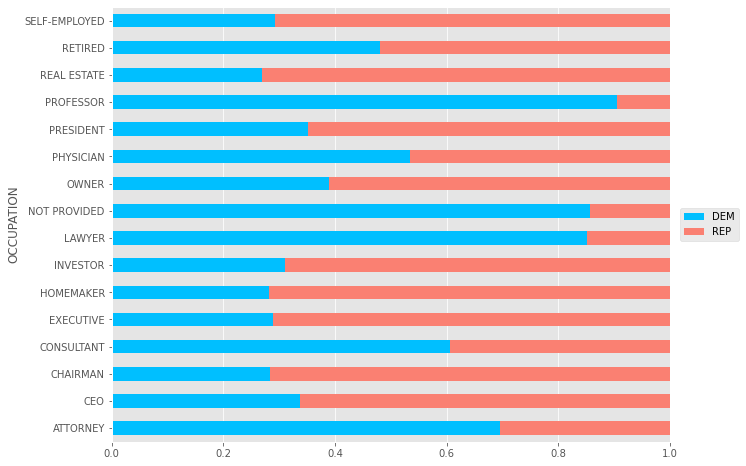

In [75]:
# Stacked bar chart --> easier comparison of total 1
_ = over_10mm_pct.plot(kind='barh', color=('deepskyblue', 'salmon'), stacked=True, figsize=(10, 8))
plt.xlim((0, 1))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

Therefore we have seen that occupation relationship with each party

In [76]:
# How much money each candidate received
fec.groupby('CAND_NAME').sum()

,TRANSACTION_AMT
CAND_NAME,
"OBAMA, BARACK",562711400.0
"ROMNEY, MITT",659176427.0


Mitt Romney had more contributions , but as we know Obama has won the elections.
And also this cannot be backed up by a simple google search
Hence as a lesson , check and re-check out data. Eventhough we have cleared out some data , it seems it was not good enough.
Using common sense is the only thing that will make us understand our data.